In [1]:
import pandas as pd
import numpy as np

from glob import glob
from configs import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


name_mapping = {
    'CatBoostRegressor':         "CatBoost",
    'GradientBoostingRegressor': "GBDT",
    'KNeighborsRegressor':       "KNN",
    'LinearRegression':          "MLR",
    'MLPRegressor':              "MLP",
    'RandomForestRegressor':     "RF",
    'SVR':                       "SVR",
    'XGBRegressor':              "XGBoost",
}

paths = glob("results/predictions*")

df = []
for path in paths:
    tmp_df = pd.read_pickle(path)
    df.append(tmp_df)
df = pd.concat(df)
df.model = df.model.replace(name_mapping)
# display(df.head())

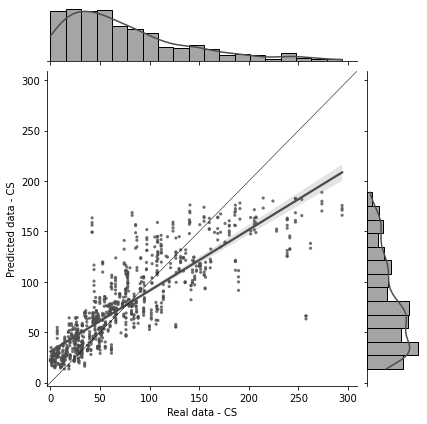

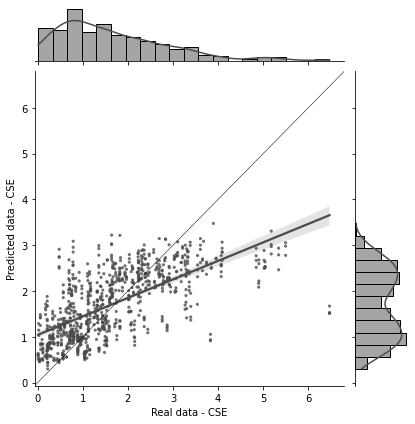

In [2]:
for TARGET in [TARGET_CARBON, TARGET_CARBON_IC]:
    
    target_name = "TARGET_CARBON" if TARGET == TARGET_CARBON else "TARGET_CARBON_IC"
    
    data = df[
        (df.model=="RF") &\
        (df.config=="CONFIG_2") &\
        (df.target==TARGET)
    ]

    # fig, ax = plt.subplots(
    #     figsize=(6, 6),
    # )

    test = np.concatenate(data.y_test.values.tolist())
    pred = np.concatenate(data.y_pred.values.tolist())

    data_df = pd.DataFrame({"test":test, "pred":pred})

    axs = sns.jointplot(
        data=data_df,
        x='test',
        y='pred',
        color=".3",
        kind="reg",
        joint_kws=dict(scatter_kws=dict(s=10,ec=None,)),
    )
    
    ax = axs.ax_joint

    ax.set(
        xlabel='Real data - '+TARGET,
        ylabel='Predicted data - '+TARGET,
    )

    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    maxval = max(xlims[1], ylims[1])

    ax.plot([-maxval/100,maxval], [-maxval/100,maxval], color="k", lw=.5)

    ax.set_xlim((-maxval/100, maxval))
    ax.set_ylim((-maxval/100, maxval))
    
    ax.set_xlabel("Real data - CS" if target_name == "TARGET_CARBON" else "Real data - CSE")
    ax.set_ylabel("Predicted data - CS" if target_name == "TARGET_CARBON" else "Predicted data - CSE")
    
    plt.savefig(f"results/trends_with_margins_RF_{target_name}.png", facecolor='white', bbox_inches='tight', dpi=300)
    plt.savefig(f"results/trends_with_margins_RF_{target_name}.pdf", bbox_inches='tight', dpi=300)

    plt.show()